In [5]:
import os
import random as rn
#importing tensorflow
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
import random as rn
os.environ['PYTHONHASHSEED'] = '0'


import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
import random as rn

%tensorflow_version 2.x
import tensorflow as tf
import os
import numpy as np
import pandas as pd
#import openCV
import cv2
tf.__version__

'2.4.1'

In [ ]:
Y=pd.read_csv("labels_final.csv")

#creating 16 folder corresponding to class label
for i in range(16):
  destination = 'a'+str(i)
  if not os.path.isdir(destination):
    os.makedirs(destination
                
#moving images to corresponding class label folder
from pathlib import Path
import os.path
count = 0
for i, row in Y.iterrows():
  label = row['label']
  destination = 'a'+str(label)
  file_path = row['path']
  if os.path.exists(file_path):
    shutil.move(file_path,destination)
    print(file_path) 
#creating 16 folder corresponding to class label
for i in range(16):
  destination = 'A'+str(i)
  if not os.path.isdir(destination):
    os.makedirs(destination)


folder1 = ['a'+str(i)+'/' for i in range(16)]
folder2 = ['A'+str(i)+'/' for i in range(16)]
import cv2, os
for i in range(16):
  for infile in os.listdir(folder1[i]):
    print ("file : " + infile)
    read = cv2.imread(folder1[i] + infile)
    outfile = infile.split('.')[0] + '.jpg'
    cv2.imwrite(folder2[i]+outfile,read,[int(cv2.IMWRITE_JPEG_QUALITY), 200])




folder1 = ['A'+str(i)+'/' for i in range(16)]
transfer = [['B'+str(i)+'/' for i in range(16)],['C'+str(i)+'/' for i in range(16)]] 

#moving 30% of total file to testing sub folder
for i in range(16):
  sub_fol = os.listdir(folder1[i])
  count = 0
  for i in sub_fol:
    count += 1
    if count <= len(sub_fol)*0.3:
      shutil.move(folder1[i],transfer[0][i])

#moving 30% of remaining file to validation sub folder
for i in range(16):
  sub_fol = os.listdir(folder1[i])
  count = 0
  for i in sub_fol:
    count += 1
    if count <= len(sub_fol)*0.3:
      shutil.move(folder1[i],transfer[1][i])


#creating sub folder for training_data, testing_data and validation_data
dir = ['training_data/','testing_data/','validation_data/']
for i in range(3):
  destination = dir[i]
  if not os.path.isdir(destination):
    os.makedirs(destination)  

#moving folder of type 'a', , 'b' and 'c' to training_data, testing_data and validation_data
folders = [['A'+str(i)+'/' for i in range(16)],['B'+str(i)+'/' for i in range(16)],['C'+str(i)+'/' for i in range(16)]]
for i ,j in enumerate(folders):
  for k in j:
    shutil.move(k,dir[i])


name = ['letter','form','email','handwritten','advertisement','scientific report','scientific publication','specification',
         'file folder','news article','budget' ,'invoice','presentation','questionnaire','resume','memo']
folders = [['A'+str(i)+'/' for i in range(16)],['B'+str(i)+'/' for i in range(16)],['C'+str(i)+'/' for i in range(16)]]       
for i in range(3):
  for j in range(len(name)):
    os.rename(folders[i][j],name[i]) 

In [7]:
dir_path = "training_data"
os.listdir(dir_path)
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  letter  category is  2110
No of Images in  form  category is  2103
No of Images in  email  category is  2080
No of Images in  handwritten  category is  2105
No of Images in  advertisement  category is  2081
No of Images in  scientific report  category is  2113
No of Images in  scientific publication  category is  2068
No of Images in  specification  category is  2061
No of Images in  file folder  category is  2064
No of Images in  news article  category is  2062
No of Images in  budget  category is  2116
No of Images in  invoice  category is  2134
No of Images in  presentation  category is  2066
No of Images in  questionnaire  category is  2170
No of Images in  resume  category is  2130
No of Images in  memo  category is  2137


In [7]:
##Getting size of images
list_of_heights = []
list_of_widths = []
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # get dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])  

In [25]:
print(len(list(set(list_of_heights))))
print(list(set(list_of_heights)))

1
[1000]


(0.0, 900.0)

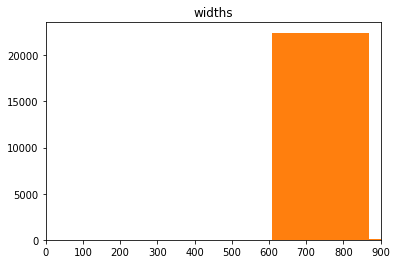

In [20]:
plt.hist(list_of_widths,bins=20)
plt.hist(list_of_widths)
plt.title('widths')
plt.xlim(0,900)

In [9]:
np.median(list_of_heights)

1000.0

In [10]:
np.mean(list_of_heights)

1000.0

In [11]:
np.median(list_of_widths)

760.0

In [12]:
np.mean(list_of_widths)

766.1904867649671

## MODEL-1

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/HK ROBOT/VGG16_DATA/data/training_data',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/Shareddrives/HK ROBOT/VGG16_DATA/data/validation_data',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 22516 images belonging to 16 classes.
Found 10080 images belonging to 16 classes.


In [13]:

vgg16_model = applications.vgg16.VGG16(weights='imagenet')

model = Sequential()

for layer in vgg16_model.layers[:19]:
  model.add(layer)
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(units=600,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(16, activation='softmax'))   


 

for layer in model.layers[:18]:
  layer.trainable = False  



model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',
              metrics=['accuracy'])

%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

import tensorflow as tf
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint


log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, 
                                                      write_graph=True,write_grads=True)


callback_list = [tensorboard_callback]





model.fit(train_generator,steps_per_epoch=1050,epochs=6,validation_data=validation_generator,
          validation_steps=450,callbacks=callback_list)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/6
1050/1050 [==============================] - 605s 576ms/step - loss: 1.3929 - accuracy: 0.5785 - val_loss: 1.3277 - val_accuracy: 0.5971
Epoch 2/6
1050/1050 [==============================] - 582s 554ms/step - loss: 1.3406 - accuracy: 0.5931 - val_loss: 1.3138 - val_accuracy: 0.6020
Epoch 3/6
1050/1050 [==============================] - 551s 524ms/step - loss: 1.2955 - accuracy: 0.6111 - val_loss: 1.2662 - val_accuracy: 0.6169
Epoch 4/6
1050/1050 [==============================] - 547s 521ms/step - loss: 1.2740 - accuracy: 0.6138 - val_loss: 1.2281 - val_accuracy: 0.6305
Epoch 5/6
1050/1050 [==============================] - 562s 535ms/step - loss: 1.2393 - accuracy: 0.6262 - val_loss: 1.2266 - val_accuracy: 0.6291
Epoch 6/6
1050/1050 [==============================] - 569s 542ms/step - loss: 1.2266 - accuracy: 0.6263 - val_loss: 1.2072 - val_accuracy: 0.6369


# MODEL :- 2

In [11]:

vgg16_model = applications.vgg16.VGG16(weights='imagenet')

model = Sequential()

for layer in vgg16_model.layers[:19]:
  model.add(layer)

model.add(Conv2D(filters=4096,kernel_size=(7,7),activation='relu'))
model.add(Conv2D(filters=4096,kernel_size=(1,1),activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='softmax'))   


 

for layer in model.layers[:18]:
  layer.trainable = False  


model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=optimizer ,loss='categorical_crossentropy',metrics=['accuracy'])
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

import tensorflow as tf
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint


log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)


callback_list = [tensorboard_callback]





model.fit(train_generator,steps_per_epoch=1050,epochs=6,validation_data=validation_generator,
          validation_steps=450,callbacks=callback_list)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/6
1050/1050 [==============================] - 563s 535ms/step - loss: 1.7282 - accuracy: 0.4643 - val_loss: 1.2188 - val_accuracy: 0.6234
Epoch 2/6
1050/1050 [==============================] - 542s 516ms/step - loss: 1.1905 - accuracy: 0.6331 - val_loss: 1.1044 - val_accuracy: 0.6651
Epoch 3/6
1050/1050 [==============================] - 518s 493ms/step - loss: 1.0754 - accuracy: 0.6631 - val_loss: 1.0019 - val_accuracy: 0.6916
Epoch 4/6
1050/1050 [==============================] - 543s 518ms/step - loss: 0.9802 - accuracy: 0.6948 - val_loss: 0.9553 - val_accuracy: 0.7084
Epoch 5/6
1050/1050 [==============================] - 530s 504ms/step - loss: 0.9220 - accuracy: 0.7149 - val_loss: 0.9582 - val_accuracy: 0.7103
Epoch 6/6
1050/1050 [==============================] - 524s 499ms/step - loss: 0.8647 - accuracy: 0.7344 - val_loss: 0.8960 - val_accuracy: 0.7286


# MODEL:- 3

In [13]:

vgg16_model = applications.vgg16.VGG16(weights='imagenet')

model = Sequential()

for layer in vgg16_model.layers[:19]:
  model.add(layer)

model.add(Conv2D(filters=4096,kernel_size=(7,7),activation='relu'))
model.add(Conv2D(filters=4096,kernel_size=(1,1),activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='softmax'))   


 

for layer in model.layers[:12]:
  layer.trainable = False  


model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary() 

553467904/553467096 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_______________________________________________________

In [ ]:

%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

import tensorflow as tf
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint


log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, 
                                                      write_graph=True,write_grads=True)


callback_list = [tensorboard_callback]





model.fit(train_generator,steps_per_epoch=704,epochs=3,validation_data=validation_generator,
          validation_steps=315,callbacks=callback_list)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/3
704/704 [==============================] - 9882s 14s/step - loss: 1.4637 - accuracy: 0.5449 - val_loss: 1.1389 - val_accuracy: 0.6516
Epoch 2/3
704/704 [==============================] - 4348s 6s/step - loss: 1.0526 - accuracy: 0.6779 - val_loss: 0.9842 - val_accuracy: 0.7038
Epoch 3/3
704/704 [==============================] - 4196s 6s/step - loss: 0.8747 - accuracy: 0.7303 - val_loss: 0.8779 - val_accuracy: 0.7394
